<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *Regression***

###**Tenggat Waktu: 26 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab6_NPM_Nama.ipynb**. Contoh: A_Lab6_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **26 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Riris Melissa Winona Togatorop"
KELAS = "E"
NPM = "1906398906"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Riris Melissa Winona Togatorop dari kelas E dengan NPM 1906398906, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Riris Melissa Winona Togatorop)


## Intro to Linear Models for Regression and Classification

Pada lab kali ini, Anda akan mengimplementasikan model-model linear untuk melakukan prediksi regresi maupun klasifikasi. Beberapa model tersebut antara lain:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Logistic Regression
- Softmax Regression

Sebelum ke latihan soal, mari pelajari sekilas mengenai beberapa model linear ini serta implementasinya dengan menggunakan Scikit-learn.

**NOTE:** Penjelasan di sini, sebagian besar, hanya untuk menunjukkan saja. Anda perlu belajar dari sumber lain (contoh: slide kuliah) untuk lebih memahami materi-materi di sini. Walau demikian, semoga penjelasan di sini dapat membantu Anda :)

### Linear Regression

Linear regression adalah teknik pencarian nilai-nilai parameter suatu persamaan linear yang cocok dengan data. Persamaan linear yang cocok adalah persamaan yang memiliki perbedaan hasil prediksi dan aktual minimal.

Contoh persamaan linear

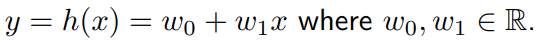

Persamaan di atas adalah fungsi yang memetakan **X** ke **Y** (anggap Y = h(x)), dengan:
- w0 adalah intersep
- w1 adalah koefisien
- x adalah nilai independen
- y adalah nilai dependen

Tentunya, persamaan ini bisa digeneralisasikan untuk banyak nilai x (fitur lebih dari 1) untuk menentukan nilai y. Berikut adalah persamaannya.

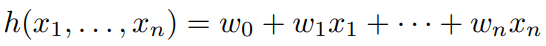

atau

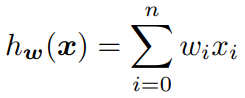

Nilai-nilai parameter seperti w0, w1, w2, wn, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimal kan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression.

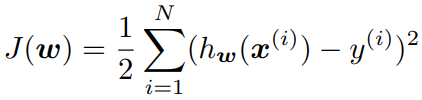

Proses peminimalan fungsi loss disebut dengan gradient descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 3 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2x1+x2-x3`. Nilai-nilai 1, 2, 1, dan -1, secara berurutan dapat dianggap sebagai nilai w0, w1, w2, dan w3.

In [3]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_train   = np.array([6, 10, 4, 11, 12, 9, 4, 7, 7, 1])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [ 6 10  4 11 12  9  4  7  7  1]


In [4]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [5]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model

print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [ 1.90430504  1.2595326  -1.03653137]
Intersep persamaan linear: 
 0.5921279212792117


Dapat dilihat bahwa nilai-nilai di atas hampir mirip dengan nilai-nilai intersep dan koefisien fungsi yang didefinisikan sebelumnya.

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [6]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_test = np.array([7, 2])

y_predict = linear.predict(X_test)

print(y_predict)

[7.14280443 2.12890529]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik. 

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [7]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9970392257428109


Dari hasil di atas, dapat diketahui bahwa perbedaan antara prediksi dan aktual memiliki nilai yang kecil.

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension). 

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

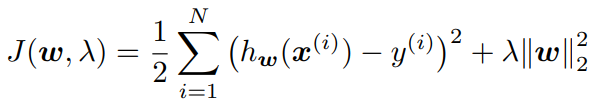

- Lasso Regression

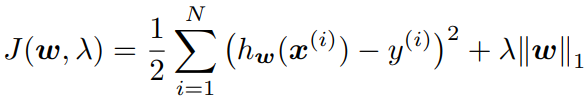

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset housing.

In [8]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5) # Mengatur hyperparameter alpha=5
ridge.fit(X_train, y_train)

Ridge(alpha=5)

Setelah pelatihan selesai, **ridge** sudah memiliki parameter-parameter yang dianggap cocok dalam persamaan linear regression dengan generalisasi ridge regression.

In [9]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=5) # Mengatur hyperparameter alpha=5
lasso.fit(X_train, y_train)

Lasso(alpha=5)

Setelah pelatihan selesai, **ridge** sudah memiliki parameter-parameter yang dianggap cocok dalam persamaan linear regression dengan generalisasi ridge regression.

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil.

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

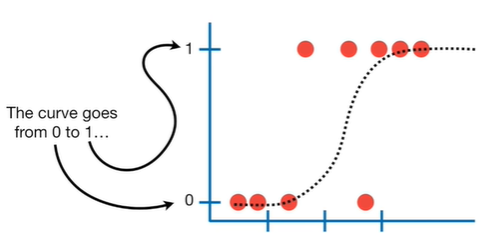

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

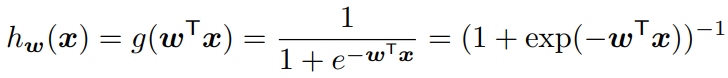

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual. 

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

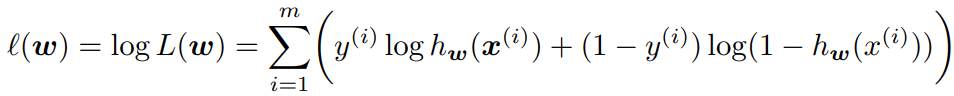

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Data yang digunakan sama seperti pada bagian sebelumnya, hanya saja terdapat perubahan pada data target. Kali ini target hanya berisi nilai 0 atau 1. Nilai target (y_logistic_train) diolah dari y_train, dengan kondisi: bernilai 0 jika y_train >= 7 dan bernilai 1 jika sebaliknya.


In [10]:
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_logistic_train   = np.array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [ 6 10  4 11 12  9  4  7  7  1]


In [11]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [12]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_test = np.array([1, 0])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [13]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

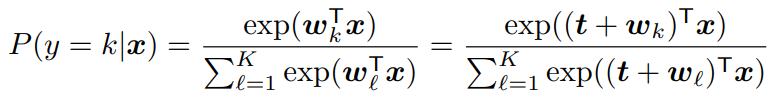

Persamaan likelihood softmaxe regression:

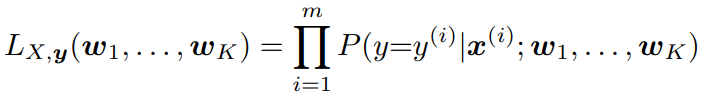

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Data yang digunakan sama seperti pada bagian sebelumnya, hanya saja terdapat perubahan pada data target. Kali ini target hanya berisi nilai 0, 1, 2. Nilai target (y_softmax_train) diolah dari y_train, dengan kondisi: bernilai 0 jika y_train < 6, bernilai 1 jika 6 <= y_train < 9, dan bernilai 2 jika y_train >=.


In [14]:
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_softmax_train   = np.array([1, 2, 0, 2, 2, 2, 0, 1, 1, 0])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [1 2 0 2 2 2 0 1 1 0]


In [15]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [16]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_softmax_test = np.array([1, 0])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[2 0]


Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [17]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


## Latihan Soal

Pada bagian ini, Anda akan membuat prediksi regresi dan klasifikasi menggunakan beberapa model linear yang telah dipelajari di atas. Data yang digunakan lebih besar dibandingkan data buatan sebelumnya.

### Penjelasan Dataset

Dataset yang digunakan pada bagian ini adalah data perumahan di California, USA. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Longitude:** Ukuran seberapa jauh ke barat sebuah rumah; nilai yang lebih tinggi lebih jauh ke barat

- **Latitude:** Ukuran seberapa jauh ke utara sebuah rumah; nilai yang lebih tinggi lebih jauh ke utara

- **TotalRooms:** Jumlah total kamar dalam satu blok

- **TotalBedrooms:** Jumlah total kamar tidur dalam satu blok

- **Population:** Jumlah total orang yang tinggal dalam satu blok

- **Households:** Jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah, untuk satu blok

- **HousingMedianAge:** Usia median sebuah rumah dalam satu blok; angka yang lebih rendah adalah bangunan yang lebih baru

- **MedianIncome:** Pendapatan median untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS)

- **TargetMedianHouseValue:** Nilai rumah rata-rata untuk rumah tangga dalam satu blok (diukur dalam Dolar AS)

- **TargetLogistic:** Pengelompokan nilai rumah rata-rata yang dibagi menjadi dua. Pembagi berdasarkan nilai mediannya (=17845). Bernilai 1 jika targetMedianHouseValue > 178450 dan 0 sebaliknya

- **TargetSoftmax:** Pengelompokan nilai rumah rata-rata yang dibagi menjadi tiga. Pembagi berdasarkan nilai persentil ke-33.33 (=142700) dan persentil ke-66.67 (=234900). Bernilai 2 jika targetMedianHouseValue >= 234900, 1 jika 142700 <= targetMedianHouseValue < 234900, dan 0 jika targetMedianHouseValue < 142700

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/camnugent/california-housing-prices

### Preprocessing

In [18]:
import pandas as pd

# Import dataset california housing
df = pd.read_csv('ca_housing.csv')

df.head()

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome,OceanProximity,TargetMedianHouseValue,TargetLogistic,TargetSoftmax
0,-122.69,38.34,2846,516.0,1526,492,23,3.7330,<1H OCEAN,163500,0,1
1,-117.28,32.83,2392,653.0,933,619,34,3.7306,NEAR OCEAN,500000,1,2
2,-122.04,37.31,2476,434.0,1217,416,29,6.2045,<1H OCEAN,393800,1,2
3,-117.07,32.91,2234,256.0,894,253,5,10.3354,<1H OCEAN,477600,1,2
4,-117.92,33.83,382,86.0,272,81,17,1.4250,<1H OCEAN,212500,1,1


In [19]:
# Menampilkan ringkasan data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitude               1000 non-null   float64
 1   Latitude                1000 non-null   float64
 2   TotalRooms              1000 non-null   int64  
 3   TotalBedrooms           988 non-null    float64
 4   Population              1000 non-null   int64  
 5   Households              1000 non-null   int64  
 6   HousingMedianAge        1000 non-null   int64  
 7   MedianIncome            1000 non-null   float64
 8   OceanProximity          1000 non-null   object 
 9   TargetMedianHouseValue  1000 non-null   int64  
 10  TargetLogistic          1000 non-null   int64  
 11  TargetSoftmax           1000 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 93.9+ KB


In [20]:
# Melihat deskripsi statistik dari kelompok fitur numerik
df.describe()

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome,TargetMedianHouseValue,TargetLogistic,TargetSoftmax
count,1000.000000,1000.000000,1000.000000,988.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,-119.571240,35.621040,2598.210000,527.345142,1403.143000,494.167000,29.350000,3.844988,209471.146000,0.50000,1.001000
std,2.022209,2.159259,2117.999988,395.919615,1064.360733,361.361508,12.841199,1.887100,117527.151777,0.50025,0.817109
min,-124.230000,32.560000,26.000000,9.000000,26.000000,10.000000,2.000000,0.706900,14999.000000,0.00000,0.000000
25%,-121.790000,33.930000,1437.500000,299.000000,792.750000,284.000000,19.000000,2.475475,122175.000000,0.00000,0.000000
50%,-118.470000,34.235000,2101.500000,418.000000,1151.500000,398.000000,30.000000,3.534100,178450.000000,0.50000,1.000000
75%,-118.007500,37.720000,3102.250000,623.250000,1688.000000,595.750000,38.000000,4.792300,268350.000000,1.00000,2.000000
max,-115.510000,41.860000,30401.000000,4957.000000,13251.000000,4339.000000,52.000000,15.000100,500001.000000,1.00000,2.000000


In [21]:
# Melihat deskripsi statistik dari kelompok fitur kategorikal
display(df.describe(include=object))

,OceanProximity
count,1000
unique,4
top,<1H OCEAN
freq,465


**Penanganan Missing Values**

In [22]:
# Melihat jumlah missing values

def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]
    
cek_missing_values(df)

,Total,Percent
TotalBedrooms,12,0.012


Terdapat missing values pada kolom TotalBedrooms, sebesar 1.2%. Untuk mengatasi ini, nilai null diganti dengan nilai median.

In [23]:
# Menangani missing values dengan median
df.TotalBedrooms.fillna(df.TotalBedrooms.median(), inplace=True)

cek_missing_values(df)

,Total,Percent


**Penanganan Duplikasi Data**

In [24]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', df.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


**Penanganan Outliers**

In [25]:
# Melihat jumlah kemungkinan adanya outliers pada data menggunakan IQR

# Menghitung quartil 1 dan 3.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut.
outliers = (df < lower_limit) | (df > upper_limit)
print ("Outlier pada tiap atribut:")
print(outliers.sum())

Outlier pada tiap atribut:
Households                62
HousingMedianAge           0
Latitude                   0
Longitude                  0
MedianIncome              28
OceanProximity             0
Population                63
TargetLogistic             0
TargetMedianHouseValue    54
TargetSoftmax              0
TotalBedrooms             69
TotalRooms                64
dtype: int64


/var/folders/5w/17bfb9717w7_y1j1p18z6qzm0000gn/T/ipykernel_85760/992103619.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


Berdasarkan hasil di atas, terdapat beberapa outliers. Kali ini, outliers tersebut ditangani dengan menghapusnya.

In [26]:
# Menghapus outliers
df_cleaned = df[~((df <= lower_limit) | (df >= upper_limit)).any(axis=1)].reset_index(drop=True)

print(df_cleaned.shape)

(848, 12)


/var/folders/5w/17bfb9717w7_y1j1p18z6qzm0000gn/T/ipykernel_85760/1083563925.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df[~((df <= lower_limit) | (df >= upper_limit)).any(axis=1)].reset_index(drop=True)


**NOTE:** Warning di atas terjadi karena terdapat kolom yang berjenis kategorikal, yaitu OceanProximity. Tidak perlu khawatir dengan warning tersebut.

**Encoding Data Kategorikal**

Karena terdapat kolom yang berjenis kategorikal, maka perlu dilakukan encoding agar menjadi data numerik. Metode encoding yang dilakukan adalah one-hot encoding.

In [27]:
# Melakukan one-hot encoding data kategorikal

df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned.head()

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome,TargetMedianHouseValue,TargetLogistic,TargetSoftmax,OceanProximity_INLAND,OceanProximity_NEAR BAY,OceanProximity_NEAR OCEAN
0,-122.69,38.34,2846,516.0,1526,492,23,3.7330,163500,0,1,0,0,0
1,-122.04,37.31,2476,434.0,1217,416,29,6.2045,393800,1,2,0,0,0
2,-117.92,33.83,382,86.0,272,81,17,1.4250,212500,1,1,0,0,0
3,-122.26,37.77,1670,350.0,793,299,52,2.9732,282100,1,2,0,1,0
4,-122.30,38.33,4741,956.0,2043,856,15,4.1862,183600,1,1,0,1,0


**Memisahkan Kolom-Kolom Target dan Fitur**

In [28]:
# Memisahkan kolom-kolom target untuk regression, logistic regression, dan softmax regression dari kolom-kolom fitur

X = df_cleaned.drop('TargetMedianHouseValue', axis=1)
X = X.drop('TargetLogistic', axis=1)
X = X.drop('TargetSoftmax', axis=1)

y = df_cleaned['TargetMedianHouseValue']
y_logistic = df_cleaned['TargetLogistic']
y_softmax = df_cleaned['TargetSoftmax']

In [29]:
X.head()

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome,OceanProximity_INLAND,OceanProximity_NEAR BAY,OceanProximity_NEAR OCEAN
0,-122.69,38.34,2846,516.0,1526,492,23,3.7330,0,0,0
1,-122.04,37.31,2476,434.0,1217,416,29,6.2045,0,0,0
2,-117.92,33.83,382,86.0,272,81,17,1.4250,0,0,0
3,-122.26,37.77,1670,350.0,793,299,52,2.9732,0,1,0
4,-122.30,38.33,4741,956.0,2043,856,15,4.1862,0,1,0


Pada tahap ini, kita sudah memiliki:
- **X:** kolom-kolom fitur
- **y:** kolom target untuk linear, ridge, dan lasso regression
- **y_logistic:** kolom target logistic regression
- **y_softmax:** kolom target softmax regression

Dataset sudah siap digunakan. Saat ini, Anda diminta untuk mengerjakan latihan soal di bawah ini.

### Soal 1: Linear Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state = 191)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set.

In [63]:
# lakukan standarisasi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train) # training
X_test_scaled = scaler.transform(x_test) # testing

c. Lakukan prediksi TargetMedianHouseValue menggunakan Linear Regression

In [64]:
# Prediksi data test
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
print(y_pred)


[274675.98572697 233834.69458471 240465.3562162  125562.64625328
  54882.15289968 143556.2249789  255518.09837709  89541.86557345
 325051.64839081 296800.76863884  26245.5806899  240304.60633345
 257404.00290633 167298.68843644  71713.75518661 103296.27228207
 133523.11966654 127804.93500301 194159.96681152 134194.419629
  33956.55988696 245079.03116133 175618.96561209 118207.35109923
 247971.28862513  79554.36291327 307520.2517649  297603.07830568
 258577.19676963  47807.39392351 234614.60052042 198214.97759281
 113023.0241589  272725.69216623  81094.83894915 243994.57313322
 160648.2390545  267912.55588393 217401.43583603 256228.39697577
 259349.19850624 237587.45986528 241899.33651497 138140.96618118
 136260.60517854  92384.22350667 171641.13550364 134180.6164656
 319698.78250957 153554.51568372 237828.42282706  90026.30402115
 298566.77197359 199480.44670063 138516.21301032 293520.96178066
 245570.32158357  83483.03806241  84808.88103055 135029.32079081
 190261.57510752 111085.2888

d. Tampilkan visualisasi perbandingan hasil prediksi dengan aktual

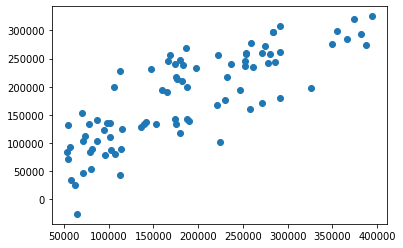

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.show()

e. Persamaan linear apa yang terbentuk pada model linear regression yang dilatih?

In [34]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model

print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [-52566.00700638 -55848.31064805 -12490.07602684  24241.19586676
 -39789.58367311  28705.38579816  13443.487133    62181.61195895
 -13742.49161354  -4973.78910445  -3235.27469359]
Intersep persamaan linear: 
 189335.51638270007


TargetMedianHouseValue = -52566.00700638Longitude - 55848.31064805Latitude - 12490.07602684TotalRooms + 24241.19586676TotalBedrooms - 39789.58367311Population + 28705.38579816Households + 13443.487133HousingMedianAge + 62181.61195895MedianIncome - 13742.49161354OceanProximity_INLAND - 4973.78910445OceanProximity_NEAR BAY - 3235.27469359OceanProximity_NEAR OCEAN + 189335.51638270007

f. Tampilkan metrik evaluasi regresi yang mencakup MSE, MAE, RMSE, dan R2 Squared!

In [35]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [36]:
metrics(y_pred)

MAE: 43644.98158112198
MSE: 2936853627.3416805
RMSE: 54192.74515414107
R_squared: 0.6621158640749694


### Soal 2: Ridge Regression

Ikuti langkah-langkah di bawah ini. Gunakan training dan testing set yang sama dengan Linear Regression.

a. Tentukan minimal 5 buah nilai parameter alpha untuk digunakan dalam membangun model Ridge Regression

In [74]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

alpha = [1,2,3,4,5]

b. Bangun (fit) model sebanyak nilai parameter alpha yang dipilih 

In [75]:
from sklearn import metrics 
rsquaredtraining = []
rsquaredtesting = []

for i in alpha:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    y_train_pred = ridge.predict(X_train_scaled)
    rsquaredtraining.append(metrics.r2_score(y_train, y_train_pred))
    rsquaredtesting.append(metrics.r2_score(y_test, y_pred))

c. Tampilkan nilai R-squared untuk masing-masing model pada training dan testing set

In [76]:
# Model Training
print("R-squared pada training set")
for i in rsquaredtraining:
    print("- " + str(i))


print("\nR-squared pada testing set")
# Model Testing
for j in rsquaredtesting:
    print("- " + str(j))

R-squared pada training set
- 0.6317434662565926
- 0.6316348163991911
- 0.6314732332398701
- 0.631270329424998
- 0.6310350147734065

R-squared pada testing set
- 0.6630297944747856
- 0.6638378116518873
- 0.6645583099147576
- 0.6652054412058543
- 0.6657902578725405


d. Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Alpha yang saya tetapkan secara berurutan semakin besar, namun hasil yang diperolehpun pada masing-masing training dan testing berbeda. Hasil yang saya dapatkan pada data training, nilai R-squarednya semakin turun, atau dalam kata lain semakin buruk. Sedangkan pada data testing, nilai Rsquarednya semakin naik, dalam kata lain semakin baik.
Walaupun begitu, perubahan nilai paramater alpha yang digunakan, kita dapat melihat dari perbandingan R-squared yang diperoleh, hasilnya berubah-ubah namun perbedaannya tidak begitu signifikan.

### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. Gunakan training dan testing set yang sama dengan Linear Regression.

a. Tentukan minimal 5 buah nilai parameter alpha untuk digunakan dalam membangun model Lasso Regression

In [77]:
# Melatih model Lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

alpha = [1,2,3,4,5]

b. Bangun (fit) model sebanyak nilai parameter alpha yang dipilih

In [78]:
from sklearn import metrics 
rsquaredtraining = []
rsquaredtesting = []

for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    y_train_pred = lasso.predict(X_train_scaled)
    rsquaredtraining.append(metrics.r2_score(y_train, y_train_pred))
    rsquaredtesting.append(metrics.r2_score(y_test, y_pred))

c. Tampilkan nilai R-squared untuk masing-masing model pada training dan testing set

In [79]:
# Model Training
print("R-squared pada training set")
for i in rsquaredtraining:
    print("- " + str(i))


print("\nR-squared pada testing set")
# Model Testing
for j in rsquaredtesting:
    print("- " + str(j))

R-squared pada training set
- 0.6317838649367075
- 0.6317838281598278
- 0.6317837668510622
- 0.6317836809682015
- 0.6317835706821529

R-squared pada testing set
- 0.662139807125703
- 0.6621637175940975
- 0.6621876042803617
- 0.6622114703410947
- 0.6622352872566397


d. Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Berdasarkan hasil yang diperoleh, sama seperti Lasso Regression, nilai Rsquared pada training set semakin menurun, sedangkan pada testing set, nilai Rsquared semakin menaik. Namun demikian, perbedaan yang diperoleh pada setiap nilai Rsquared lebih tidak signifikan dibandingkan yang didapatkan dari Lasso Regression.

### Soal 4: Logistic Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_logistic_train, y_logistic_test = train_test_split(X, y_logistic, test_size = 0.1, random_state = 88)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

c. Lakukan prediksi TargetLogistic menggunakan Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)
y_logistic_predict = logistic.predict(X_test)

d. Tampilkan confussion matrix hasil prediksi

In [86]:
y_actual = pd.Series(np.array(y_logistic_test), name = "actual")
y_pred = pd.Series(np.array(y_logistic_predict), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
display(df_confusion)

prediction,0,1
actual,,
0,36,4
1,9,36


e. Tampilkan hasil evaluasi model klasifikasi

In [87]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [89]:
evaluate_classifier_performance(y_logistic_predict ,y_logistic_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        40
           1       0.90      0.80      0.85        45

    accuracy                           0.85        85
   macro avg       0.85      0.85      0.85        85
weighted avg       0.85      0.85      0.85        85


Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8470588235294118
F1 Micro Average: 0.8470588235294118
Precision Macro Average: 0.8500000000000001
Precision Micro Average: 0.8470588235294118
Recall Macro Average: 0.8500000000000001
Recall Micro Average: 0.8470588235294118



f. Berikan analisis terhadap hasil evaluasi

Berdasarkan hasil diatas, kita mendapati nilai F1 pada model yang diperoleh berkisar pada nilai 85%. Sehingga performa model tersebut belum cukup baik.

### Soal 5: Softmax Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_softmax_train, y_softmax_test = train_test_split(X, y_softmax, test_size = 0.1, random_state = 88)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set.

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

c. Lakukan prediksi TargetSoftmax menggunakan Softmax Regression

In [92]:
softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)
y_softmax_predict = softmax.predict(X_test)

d. Tampilkan confussion matrix hasil prediksi

In [93]:
y_actual = pd.Series(np.array(y_softmax_test), name = "actual")
y_pred = pd.Series(np.array(y_softmax_predict), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
display(df_confusion)

prediction,0,1,2
actual,,,
0,20,8,1
1,10,12,4
2,1,8,21


e. Tampilkan hasil evaluasi model klasifikasi

In [94]:
evaluate_classifier_performance(y_softmax_predict ,y_softmax_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        29
           1       0.43      0.46      0.44        26
           2       0.81      0.70      0.75        30

    accuracy                           0.62        85
   macro avg       0.63      0.62      0.62        85
weighted avg       0.64      0.62      0.63        85


Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.6203703703703703
F1 Micro Average: 0.6235294117647059
Precision Macro Average: 0.6271416755287723
Precision Micro Average: 0.6235294117647059
Recall Macro Average: 0.6170645446507516
Recall Micro Average: 0.6235294117647059



f. Berikan analisis terhadap hasil evaluasi

Berdasarkan hasil diatas, kita mendapati nilai F1 pada model yang diperoleh berkisar pada nilai 62%. Sehingga performa model tersebut digolongkan tidak baik.

### Soal 6: Pertanyaan Teoritis

Jawablah pertanyaan-pertanyaan di bawah ini.

a. Pada bagian preprocessing data dilakukan one-hot encoding untuk kolom kategorikal. Perhatikan bahwa terdapat pengaturan parameter **drop_first=True**. Apa yang dilakukan oleh pengaturan tersebut? Apa manfaatnya bagi pemodelan linear regression?

Pengaturan parameter drop_first=True digunakan untuk melakukan drop pada kolom pertama hasil one hot encoding. Hal ini ditujukan agar fitur tersebut linearly independent dan korelasinya rendah.

b. Bandingkan perbedaan hasil linear, ridge, dan lasso regression yang telah Anda lakukan. Apa hal menarik yang Anda dapatkan?

- Ridge - Hasil Rsquared yang diperoleh dari alpha yang berbeda-beda tidak berbeda secara signifikan.  
- Lasso -  Hasil Rsquared yang diperoleh dari alpha yang berbeda-beda lebih tidak berbeda secara signifikan dibandingkan ridge.

c. Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Lasso Regression dapat dijadikan model untuk feature selection karena gradien pada regresi ridge hanya akan mendekati 0 dan tidak akan mencapainya, sedangkan gradien pada regresi Lasso dapat mencapai 0. Jika nilainya mencapai 0, maka artinya atribut tersebut tidak digunakan.